# ENVIRONMENT

In [1]:
import os
import acquire
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# ACQUIRE

In [2]:
df1 = acquire.read_data('data08.csv')
df2 = acquire.read_data('data10.csv')
df3 = acquire.join_data('data08.csv', 'data10.csv')

In [3]:
df1.head()

CASEID  MARITAL  B1AGE  AGEDISP  RACER  SEX_N  AGE_N  RACE_N  HSPNC_N  \
0  108395        1     18        4      1      1     23       1        1   
1  108397      999     30        4      9      1     36       1        1   
2  108399        1     27        1      1      1     29       1        1   
3  108443        1     19        1      1      1     22       1        1   
4  108444        1     18        1      1      1     21       1        1   

   OTHERR_N    ...     REASONR5  CHILDCB  L28KIDSN  KIDSNUM  FOSTER_N  \
0         1    ...         9999        0         3      999      9999   
1         1    ...         9999        0         3      999      9999   
2         1    ...         9999        0         1        2      9999   
3         1    ...         9999        0         3      999      9999   
4         1    ...         9999        1         1        1      9999   

   KIDLIV_N  KIDIV2_N  DECEASED  STDETAI  STEPCHIL  
0       777      9999         0        1         1  
1       777      9999         0        2         2  
2         1      9999         0        1         1  
3       777      9999         0        2         2  
4         1      9999         0        5         2  

[5 rows x 64 columns]

In [4]:
df2.head()

CASEID  INVIEWN    IDINCID  INCIDENT  FORCED  YEAR  MONTH  DAY  DATECERT  \
0  108395        1  108395000         2       0  1997     12   15         2   
1  108397        1  108397000         1       0  1997      6   28         2   
2  108397        1  108397000         4       0  1998      1   20         2   
3  108399        1  108399000         1       0  1998      1    3         2   
4  108399        1  108399000         3       0  1998      1   27         2   

   USOBJ   ...     NDRUGS  BOTHDRUG  SUBSTANC  SEVEREST  TOINC  INTYEAR  \
0      2   ...          0         0         1         2      1     1998   
1      2   ...          0         0         2         4      2     1998   
2      1   ...          0         0         2         4    999     1998   
3      2   ...          0         0         1         3      2     1998   
4      2   ...          0         0         1         3    999     1998   

   INTMONTH  INTDAY  DAYSTOIN  DATECOM  
0         1      27        43        1  
1         1      27       213        1  
2         1      27         7        1  
3         1      30        27        1  
4         1      30         3        1  

[5 rows x 52 columns]

In [5]:
df3.head()

CASEID  MARITAL  B1AGE  AGEDISP  RACER  SEX_N  AGE_N  RACE_N  HSPNC_N  \
0  108395        1     18        4      1      1     23       1        1   
1  108397      999     30        4      9      1     36       1        1   
2  108397      999     30        4      9      1     36       1        1   
3  108399        1     27        1      1      1     29       1        1   
4  108399        1     27        1      1      1     29       1        1   

   OTHERR_N   ...     NDRUGS  BOTHDRUG  SUBSTANC  SEVEREST  TOINC  INTYEAR  \
0         1   ...          0         0         1         2      1     1998   
1         1   ...          0         0         2         4      2     1998   
2         1   ...          0         0         2         4    999     1998   
3         1   ...          0         0         1         3      2     1998   
4         1   ...          0         0         1         3    999     1998   

   INTMONTH  INTDAY  DAYSTOIN  DATECOM  
0         1      27        43        1  
1         1      27       213        1  
2         1      27         7        1  
3         1      30        27        1  
4         1      30         3        1  

[5 rows x 115 columns]

# PREPARE

In [6]:
def missing_values_col(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})


def missing_values_row(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by row.
    """
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})


def handle_missing_threshold(df, prop_required_column = .3, prop_required_row = .9):
    """
    Removes columns and rows whose count of missing values exceeds threshold.
    """
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df


def count_vals(column):
    return df[column].value_counts(dropna=False)

def summarize_data(df):
    
    df_head = df.head()
    print(f'HEAD\n{df_head}', end='\n\n')
   
    df_tail = df.tail()
    print(f'TAIL\n{df_tail}', end='\n\n')

    shape_tuple = df.shape
    print(f'SHAPE: {shape_tuple}', end='\n\n')
    
    df_describe = df.describe()
    print(f'DESCRIPTION\n{df_describe}', end='\n\n')
    
    df.info()
    print(f'INFORMATION')    

    print(f'VALUE COUNTS', end='\n\n')
    for col in df.columns:
        n = df[col].unique().shape[0]
        col_bins = min(n, 10)
        print(f'{col}:')
        if df[col].dtype in ['int64', 'float64'] and n > 10:
            print(df[col].value_counts(bins=col_bins, sort=False, dropna=False))
        else:
            print(df[col].value_counts(dropna=False))
        print('\n')


def plot_hist(df):
    """
    Plots the distribution of the dataframe's variables.
    """
    df.hist(figsize=(24, 20), bins=20)

In [7]:
missing_values_col(df2)

num_missing  missing_percentage  num_empty  empty_percentage  \
CASEID              0                 0.0          0               0.0   
INVIEWN             0                 0.0          0               0.0   
IDINCID             0                 0.0          0               0.0   
INCIDENT            0                 0.0          0               0.0   
FORCED              0                 0.0          0               0.0   
YEAR                0                 0.0          0               0.0   
MONTH               0                 0.0          0               0.0   
DAY                 0                 0.0          0               0.0   
DATECERT            0                 0.0          0               0.0   
USOBJ               0                 0.0          0               0.0   
KINDWEAP            0                 0.0          0               0.0   
KINDWEA2            0                 0.0          0               0.0   
WEAPON              0                 0.0          0               0.0   
GUNTYPE             0                 0.0          0               0.0   
GUNUSE              0                 0.0          0               0.0   
THREAT              0                 0.0          0               0.0   
SLAP                0                 0.0          0               0.0   
PUNCH               0                 0.0          0               0.0   
BEATING             0                 0.0          0               0.0   
TWEAPON             0                 0.0          0               0.0   
UWEAPON             0                 0.0          0               0.0   
FSEXONLY            0                 0.0          0               0.0   
MISCARG             0                 0.0          0               0.0   
RESTRAIN            0                 0.0          0               0.0   
CHOKED              0                 0.0          0               0.0   
PRSNT               0                 0.0          0               0.0   
PRSN2               0                 0.0          0               0.0   
PRSN3               0                 0.0          0               0.0   
AP                  0                 0.0          0               0.0   
BP                  0                 0.0          0               0.0   
CP                  0                 0.0          0               0.0   
OP                  0                 0.0          0               0.0   
PINJR               0                 0.0          0               0.0   
ALCOHOL             0                 0.0          0               0.0   
RDRUNK              0                 0.0          0               0.0   
NDRUNK              0                 0.0          0               0.0   
BOTHDRUN            0                 0.0          0               0.0   
POT                 0                 0.0          0               0.0   
RPOT                0                 0.0          0               0.0   
NPOT                0                 0.0          0               0.0   
DRUGS               0                 0.0          0               0.0   
RDRUGS              0                 0.0          0               0.0   
NDRUGS              0                 0.0          0               0.0   
BOTHDRUG            0                 0.0          0               0.0   
SUBSTANC            0                 0.0          0               0.0   
SEVEREST            0                 0.0          0               0.0   
TOINC               0                 0.0          0               0.0   
INTYEAR             0                 0.0          0               0.0   
INTMONTH            0                 0.0          0               0.0   
INTDAY              0                 0.0          0               0.0   
DAYSTOIN            0                 0.0          0               0.0   
DATECOM             0                 0.0          0               0.0   

          nan_count  nan_percentage  
CASEID            0             0.0  
INVIEWN    

In [8]:
missing_values_row(df2)

num_missing  percentage
0               0         0.0
1               0         0.0
2               0         0.0
3               0         0.0
4               0         0.0
5               0         0.0
6               0         0.0
7               0         0.0
8               0         0.0
9               0         0.0
10              0         0.0
11              0         0.0
12              0         0.0
13              0         0.0
14              0         0.0
15              0         0.0
16              0         0.0
17              0         0.0
18              0         0.0
19              0         0.0
20              0         0.0
21              0         0.0
22              0         0.0
23              0         0.0
24              0         0.0
25              0         0.0
26              0         0.0
27              0         0.0
28              0         0.0
29              0         0.0
...           ...         ...
4948            0         0.0
4949            0         0.0
4950            0         0.0
4951            0         0.0
4952            0         0.0
4953            0         0.0
4954            0         0.0
4955            0         0.0
4956            0         0.0
4957            0         0.0
4958            0         0.0
4959            0         0.0
4960            0         0.0
4961            0         0.0
4962            0         0.0
4963            0         0.0
4964            0         0.0
4965            0         0.0
4966            0         0.0
4967            0         0.0
4968            0         0.0
4969            0         0.0
4970            0         0.0
4971            0         0.0
4972            0         0.0
4973            0         0.0
4974            0         0.0
4975            0         0.0
4976            0         0.0
4977            0         0.0

[4978 rows x 2 columns]

In [9]:
df = df2.filter(['INCIDENT',
                 'FORCED',
                 'USOBJ',
                 'THREAT',
                 'SLAP',
                 'PUNCH',
                 'BEATING',
                 'TWEAPON',
                 'UWEAPON',
                 'FSEXONLY',
                 'MISCARG',
                 'RESTRAIN',
                 'CHOKED',
                 'RDRUNK',
                 'NDRUNK',
                 'BOTHDRUN',
                 'POT',
                 'RPOT',
                 'NPOT',
                 'DRUGS',
                 'RDRUGS',
                 'NDRUGS',
                 'BOTHDRUG',
                 'SUBSTANC',
                 'SEVEREST',
                ], axis=1)

In [10]:
df.shape

(4978, 25)

In [11]:
df.head()

INCIDENT  FORCED  USOBJ  THREAT  SLAP  PUNCH  BEATING  TWEAPON  UWEAPON  \
0         2       0      2       0     0      1        0        0        0   
1         1       0      2       0     1      0        0        0        0   
2         4       0      1       0     0      0        0        1        0   
3         1       0      2       0     1      0        0        0        0   
4         3       0      2       0     0      0        1        0        0   

   FSEXONLY    ...     BOTHDRUN  POT  RPOT  NPOT  DRUGS  RDRUGS  NDRUGS  \
0         0    ...            0    0     0     0      0       0       0   
1         0    ...            0    0     0     0      0       0       0   
2         0    ...            0    0     0     0      0       0       0   
3         0    ...            0    0     0     0      0       0       0   
4         0    ...            0    0     0     0      0       0       0   

   BOTHDRUG  SUBSTANC  SEVEREST  
0         0         1         2  
1         0         2         4  
2         0         2         4  
3         0         1         3  
4         0         1         3  

[5 rows x 25 columns]

In [12]:
summarize_data(df)

HEAD
   INCIDENT  FORCED  USOBJ  THREAT  SLAP  PUNCH  BEATING  TWEAPON  UWEAPON  \
0         2       0      2       0     0      1        0        0        0   
1         1       0      2       0     1      0        0        0        0   
2         4       0      1       0     0      0        0        1        0   
3         1       0      2       0     1      0        0        0        0   
4         3       0      2       0     0      0        1        0        0   

   FSEXONLY    ...     BOTHDRUN  POT  RPOT  NPOT  DRUGS  RDRUGS  NDRUGS  \
0         0    ...            0    0     0     0      0       0       0   
1         0    ...            0    0     0     0      0       0       0   
2         0    ...            0    0     0     0      0       0       0   
3         0    ...            0    0     0     0      0       0       0   
4         0    ...            0    0     0     0      0       0       0   

   BOTHDRUG  SUBSTANC  SEVEREST  
0         0         1         2  
1      

# MODELING

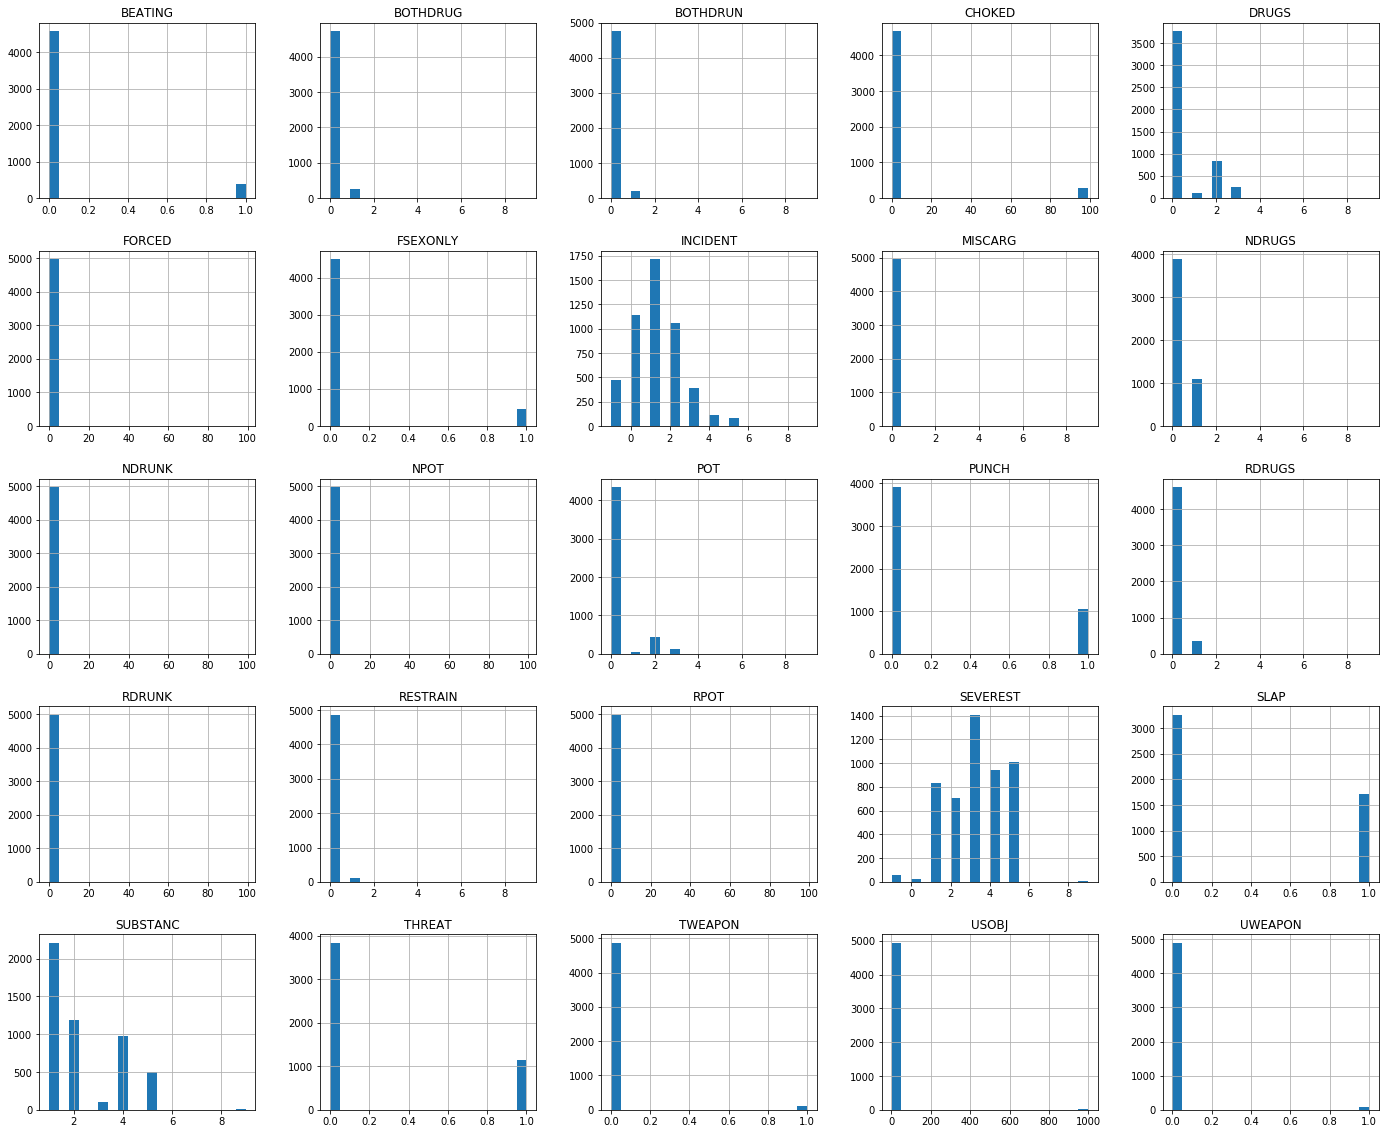

In [13]:
plot_hist(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a203b2470>,
      dtype=object)

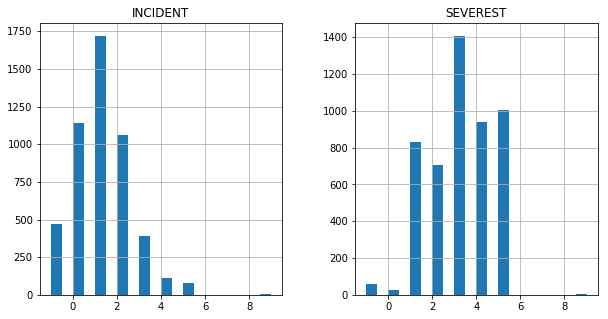

In [14]:
df[['INCIDENT','SEVEREST']].hist(figsize=(10, 5), bins=20)

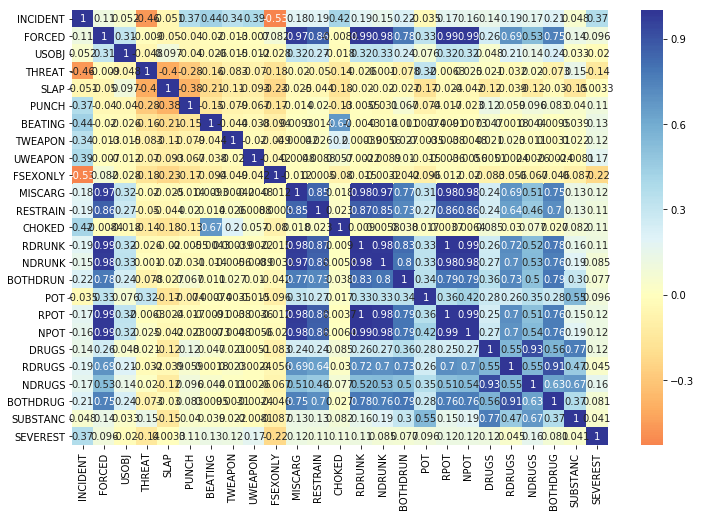

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)

In [16]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols

['INCIDENT',
 'FORCED',
 'USOBJ',
 'THREAT',
 'SLAP',
 'PUNCH',
 'BEATING',
 'TWEAPON',
 'UWEAPON',
 'FSEXONLY',
 'MISCARG',
 'RESTRAIN',
 'CHOKED',
 'RDRUNK',
 'NDRUNK',
 'BOTHDRUN',
 'POT',
 'RPOT',
 'NPOT',
 'DRUGS',
 'RDRUGS',
 'NDRUGS',
 'BOTHDRUG',
 'SUBSTANC',
 'SEVEREST']

## XGBOOST

In [17]:
df_xgb_x = df[num_cols].drop(columns=['CHOKED'])

In [18]:
fn = df_xgb_x.columns.values

/usr/local/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


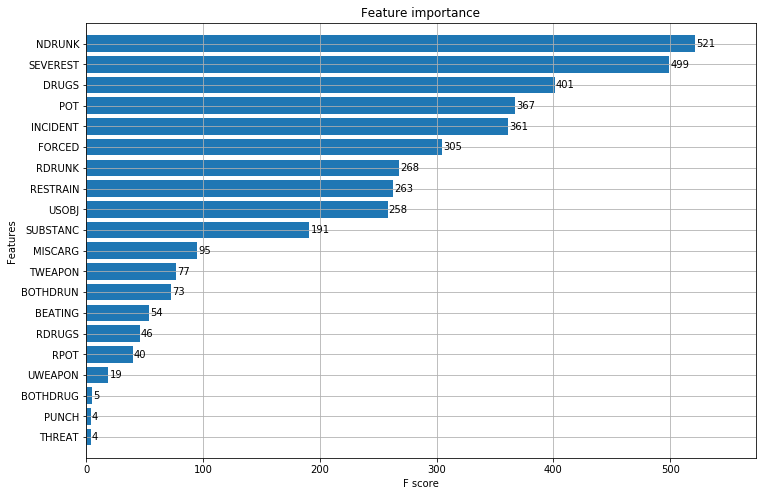

In [19]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}
dtrain = xgb.DMatrix(df_xgb_x, df.CHOKED, feature_names=fn)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## LOGISTIC REGRESSION

In [25]:
df = df2.filter(['INCIDENT',
                 'FORCED',
                 'USOBJ',
                 'THREAT',
                 'SLAP',
                 'PUNCH',
                 'BEATING',
                 'TWEAPON',
                 'UWEAPON',
                 'FSEXONLY',
                 'MISCARG',
                 'RESTRAIN',
                 'CHOKED',
                 'RDRUNK',
                 'NDRUNK',
                 'BOTHDRUN',
                 'POT',
                 'RPOT',
                 'NPOT',
                 'DRUGS',
                 'RDRUGS',
                 'NDRUGS',
                 'BOTHDRUG',
                 'SUBSTANC',
                 'SEVEREST',
                ], axis=1)

In [27]:
X = df[['NDRUNK', 'SEVEREST', 'DRUGS', 'POT', 'INCIDENT', 'FORCED', 'USOBJ']]
y = df[['CHOKED']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

NDRUNK  SEVEREST  DRUGS  POT  INCIDENT  FORCED  USOBJ
3511       1         3      0    0         0       0      2
3646       1         4      0    0         1       0      2
749        1         1      0    2         1       0      2
2756       0         5      0    0         3       0      2
275        0         4      0    0         1       0      2

In [28]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 493, solver='saga')

In [29]:
logit.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packag

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=493, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-8.78639260e-03  3.63140026e-01  5.45587997e-02  3.02538808e-02
   1.28618097e-02 -3.33736596e-02  1.15341866e-03]
 [-5.78268277e-02 -3.61607516e-01 -6.52537991e-02 -3.41576253e-02
  -8.76009138e-02 -3.21411942e-02 -2.85378671e-01]
 [ 1.85275822e-03 -4.75166683e-01 -7.60010398e-02 -3.72423858e-02
  -1.60195701e-01  3.89583608e-02 -4.69971871e-04]
 [-5.45077378e-02 -3.36810062e-01 -5.08315086e-02 -3.19407424e-02
  -4.82046386e-02 -3.24955761e-02 -2.67254160e-01]]
Intercept: 
 [ 0.15399551 -0.14158123 -0.18142982 -0.13388904]


In [31]:
y_pred = logit.predict(X_train)

In [32]:
y_pred_proba = logit.predict_proba(X_train)

In [33]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.92


In [34]:
print(confusion_matrix(y_train, y_pred))

[[3188    0   37    0]
 [  56    0    0    0]
 [   4    0    0    0]
 [ 199    0    0    0]]


In [35]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3225
           1       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         4
          99       0.00      0.00      0.00       199

   micro avg       0.92      0.92      0.92      3484
   macro avg       0.23      0.25      0.24      3484
weighted avg       0.86      0.92      0.88      3484



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.91


In [37]:
df.NDRUNK.value_counts()

0     2984
1     1990
99       4
Name: NDRUNK, dtype: int64

In [ ]:
df.shape

## DECISION-TREE

In [ ]:
X = df.drop(['CHOKED'],axis=1)
y = df[['CHOKED']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

In [ ]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
df.CHOKED.value_counts()

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
sorted(y_train.CHOKED.unique())

In [ ]:
y_train.CHOKED.value_counts()

In [ ]:
labels = sorted(y_train.CHOKED.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

## RANDOM FOREST